# Housing Prices

## Exploratory Data Analysis

In [140]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [142]:
# Load datasets
df1 = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [144]:
# Info summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [146]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [148]:
df.shape

(1460, 81)

In [150]:
# Check missing values
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Missing Value Treatment Strategy

- **Dropped rows** only for *MasVnrArea* (8 missing) and *Electrical* (1 missing) since the percentage is negligible.  
- **Categorical features** with missing values were imputed using domain-driven replacements:
  - *Alley*, *MasVnrType*, *FireplaceQu*, *Garage*, *PoolQC*, *Fence*, *MiscFeature* were replaced with **"None"** or **"No[Feature]"** to indicate absence.  
  - *Bsmt* features was replaced with **"NoBasement"**.  
- **LotFrontage** was imputed with the **median value by Neighborhood**, capturing local variation in lot sizes.  

In [153]:
# Drop rows with very few missing values (MasVnrArea and Electrical)
df = df.dropna(subset=['MasVnrArea', 'Electrical'])

In [155]:
# Alley: Replace NaN with "NoAlley"
df['Alley'] = df['Alley'].fillna('NoAlley')

# MasVnrType: Replace NaN with "None"
df['MasVnrType'] = df['MasVnrType'].fillna('None')

# Bsmt features: Replace NaN with "NoBasement"
bsmt_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for col in bsmt_cols:
    df[col] = df[col].fillna('NoBasement')

# FireplaceQu: Replace NaN with "NoFireplace"
df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFireplace')

# Garage features: Replace NaN with "NoGarage"
garage_cols = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
for col in garage_cols:
    df[col] = df[col].fillna('NoGarage')

# PoolQC: Replace NaN with "NoPool"
df['PoolQC'] = df['PoolQC'].fillna('NoPool')

# Fence: Replace NaN with "NoFence"
df['Fence'] = df['Fence'].fillna('NoFence')

# MiscFeature: Replace NaN with "None"
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [157]:
# LotFrontage: Fill with median value grouped by Neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [159]:
# Check again missing values
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


### Distribution of target variable (SalePrice)

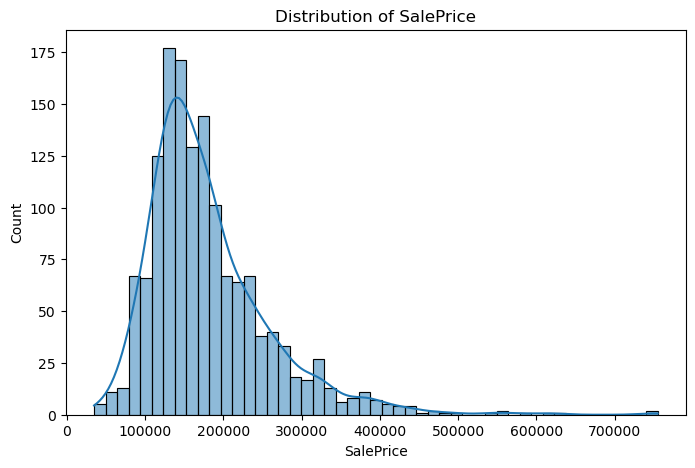

In [162]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

The target variable SalePrice is right-skewed, indicating the need for log transformation.

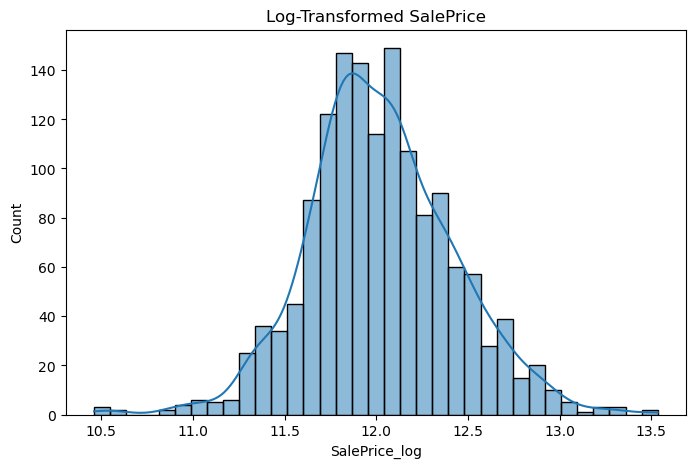

In [165]:
# Log transformation for SalePrice
df['SalePrice_log'] = np.log(df['SalePrice'])

plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice_log'], kde=True)
plt.title("Log-Transformed SalePrice")
plt.show()

After applying the log transformation, SalePrice is more normally distributed.

### Outlier Detection

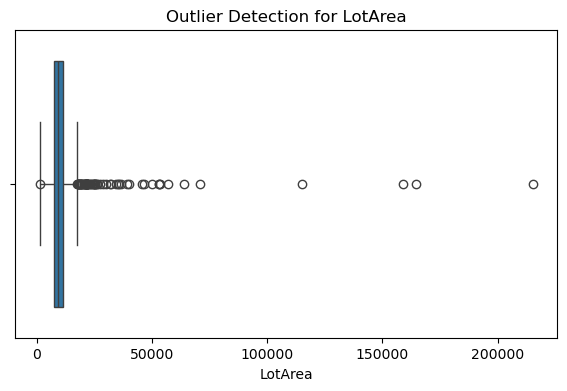

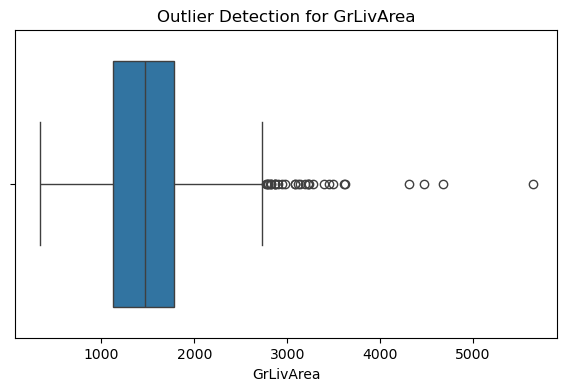

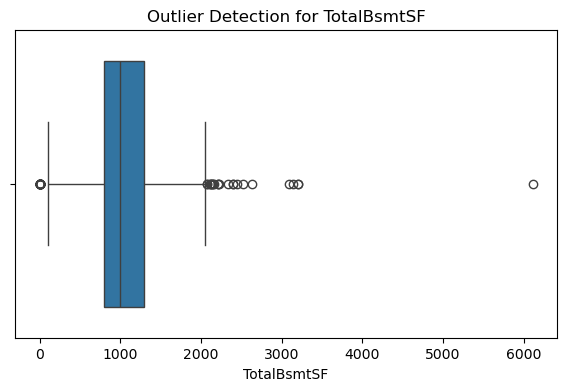

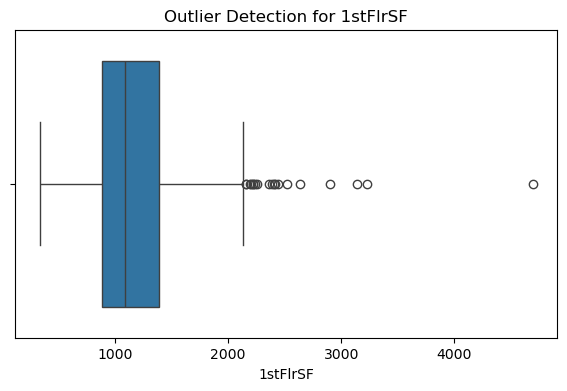

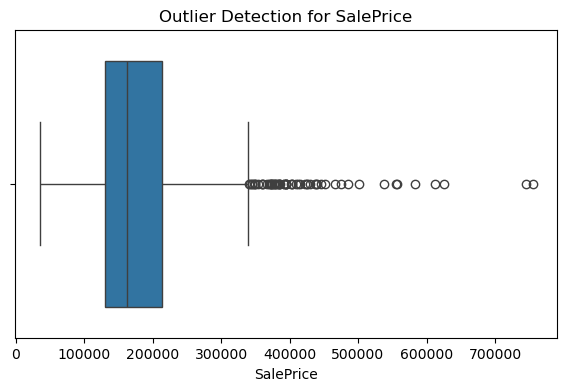

In [169]:
# Using boxplots to identify outliers for key numerical features
numerical_features = ['LotArea','GrLivArea','TotalBsmtSF','1stFlrSF','SalePrice']


for col in numerical_features:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection for {col}")
    plt.show()

In [171]:
# Handling Outliers with IQR Capping

# Columns selected for capping
features_to_cap = ['LotArea', 'GrLivArea', 'SalePrice']

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers_before = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: Outliers before = {outliers_before}", end="")

    if col in features_to_cap:
        df[col] = np.clip(df[col], lower, upper)
        outliers_after = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f" | after capping = {outliers_after}")
    else:
        print(" | no capping applied")

Id: Outliers before = 0 | no capping applied
MSSubClass: Outliers before = 103 | no capping applied
LotFrontage: Outliers before = 93 | no capping applied
LotArea: Outliers before = 67 | after capping = 0
OverallQual: Outliers before = 2 | no capping applied
OverallCond: Outliers before = 124 | no capping applied
YearBuilt: Outliers before = 7 | no capping applied
YearRemodAdd: Outliers before = 0 | no capping applied
MasVnrArea: Outliers before = 96 | no capping applied
BsmtFinSF1: Outliers before = 7 | no capping applied
BsmtFinSF2: Outliers before = 167 | no capping applied
BsmtUnfSF: Outliers before = 28 | no capping applied
TotalBsmtSF: Outliers before = 60 | no capping applied
1stFlrSF: Outliers before = 19 | no capping applied
2ndFlrSF: Outliers before = 2 | no capping applied
LowQualFinSF: Outliers before = 26 | no capping applied
GrLivArea: Outliers before = 31 | after capping = 0
BsmtFullBath: Outliers before = 1 | no capping applied
BsmtHalfBath: Outliers before = 82 | no ca

- Outliers were identified in all numeric features using the IQR rule (values below Q1 − 1.5×IQR or above Q3 + 1.5×IQR).  
- Instead of removing rows, we applied *capping* using the IQR bounds to preserve all observations.  
- Capping was applied only to the variables that showed the strongest influence of extreme values:  
  - LotArea  
  - GrLivArea 
  - SalePrice 
- Other numeric features were left unchanged to avoid unnecessary transformations.  
- After capping, these variables have no remaining outliers, resulting in more stable distributions and reducing the risk of skewed correlations or biased model training.

### Correlation with SalePrice

In [177]:
correlation = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)[1:20]
print("High Correlated Features:\n\n", correlation)

High Correlated Features:

 SalePrice_log    0.973046
OverallQual      0.816369
GrLivArea        0.729911
GarageCars       0.671504
GarageArea       0.649510
TotalBsmtSF      0.609026
1stFlrSF         0.599961
FullBath         0.585163
YearBuilt        0.568857
YearRemodAdd     0.551975
TotRmsAbvGrd     0.531328
Fireplaces       0.488140
MasVnrArea       0.443912
LotArea          0.436480
BsmtFinSF1       0.368100
LotFrontage      0.350570
WoodDeckSF       0.338019
OpenPorchSF      0.334319
2ndFlrSF         0.319003
Name: SalePrice, dtype: float64


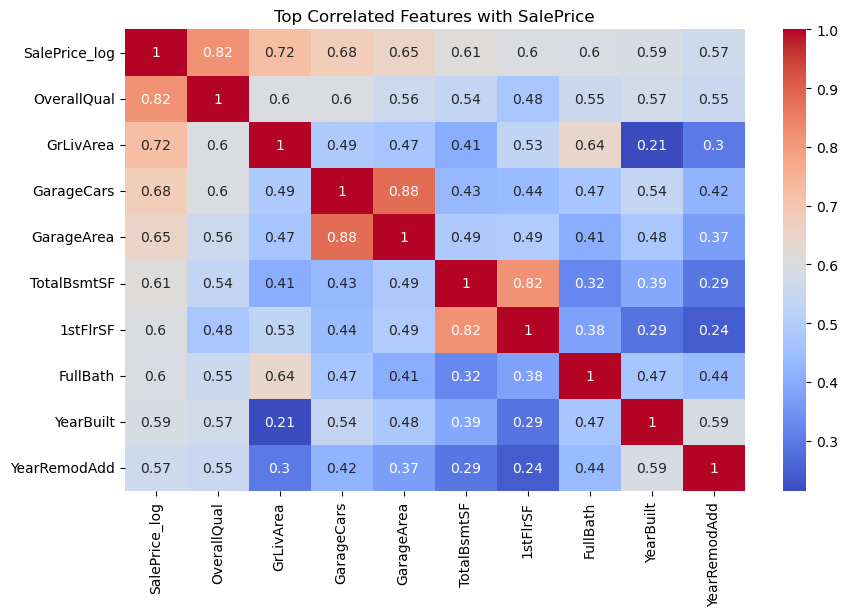

In [181]:
# Heatmap for top correlated features
plt.figure(figsize=(10,6))
top_corr_features = correlation.index[0:10]
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Top Correlated Features with SalePrice")
plt.show()

## Modeling and Evaluation

In [54]:
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# View the encoded DataFrame
df_encoded.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [55]:
numerical_cols = df_encoded.select_dtypes(include=['number']).columns
# Initialize the RobustScaler
scaler = RobustScaler()
df_scaled = df_encoded.copy()
# Fit and transform the data
df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_scaled.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.006868,0.2,0.0,-0.265787,-0.287587,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0,0.489552
1,-1.005495,-0.6,0.0,0.523686,0.002268,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0,0.167164
2,-1.004121,0.2,0.0,-0.107893,0.418147,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.668657
3,-1.002747,0.4,0.0,-0.528945,-0.010334,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,-4.0,-0.328358
4,-1.001374,0.2,0.0,0.734213,1.176812,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.985075


In [56]:
df_encoded['Street'].unique()

array([1, 0])

In [58]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Split into train and test sets (80% train, 20% test here)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shape of results
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (1103, 80)
Test set: (276, 80)


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit to training data
rf_model.fit(X_train, y_train)
# Predict on test set
y_pred = rf_model.predict(X_test)
# Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")

Mean Squared Error (MSE): 1201555386.92
R-squared (R² Score): 0.80


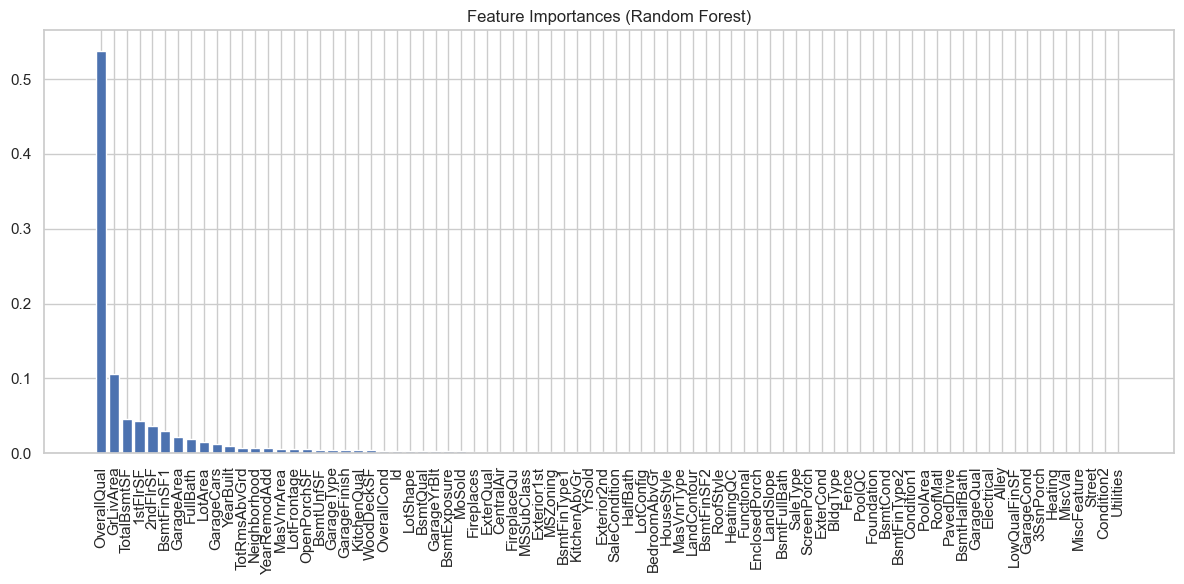

In [60]:
# Plot feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [61]:
cross_val_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
for actual, predicted in zip(y_test, y_pred):
    print(f"Original: {actual:.2f}, Predicted: {predicted:.2f}")

Original: 274000.00, Predicted: 273008.86
Original: 117500.00, Predicted: 119679.07
Original: 87000.00, Predicted: 112895.58
Original: 204000.00, Predicted: 200050.25
Original: 185000.00, Predicted: 189449.27
Original: 80000.00, Predicted: 93448.97
Original: 226000.00, Predicted: 204549.09
Original: 182900.00, Predicted: 181318.65
Original: 161000.00, Predicted: 147693.84
Original: 225000.00, Predicted: 246077.12
Original: 121600.00, Predicted: 113927.99
Original: 359100.00, Predicted: 321402.62
Original: 99500.00, Predicted: 127591.16
Original: 318000.00, Predicted: 311836.53
Original: 185000.00, Predicted: 168113.37
Original: 120000.00, Predicted: 128982.00
Original: 230000.00, Predicted: 235901.37
Original: 137500.00, Predicted: 142796.00
Original: 224000.00, Predicted: 213591.47
Original: 242000.00, Predicted: 244209.92
Original: 135000.00, Predicted: 121922.39
Original: 151000.00, Predicted: 152449.69
Original: 156000.00, Predicted: 139905.50
Original: 270000.00, Predicted: 217802

In [62]:
df_encoded.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
